In [ ]:
# IRIS FLOWER CLASSIFICATION 

In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('Iris.csv')
print(d)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
d.drop('Id',axis=1,inplace=True)

In [4]:
d.shape

(150, 5)

In [5]:
d.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
d.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
d.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
# converting categorical columns to numerical columns
d.Species=d.Species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [11]:
print(d)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

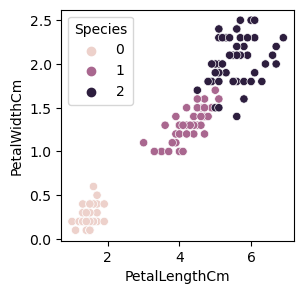

In [13]:
#EDA 
plt.figure(figsize=(3,3))
sns.scatterplot(data=d,x='PetalLengthCm',y='PetalWidthCm',hue='Species')

In [14]:
# Data Preprocessing 
d.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
d.duplicated().sum()

3

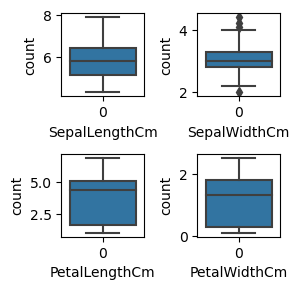

In [20]:
# Check for outliers 
plt.figure(figsize=(3,3))
pn=1
for column in d.drop('Species',axis=1):
    if pn<=4:
        ax=plt.subplot(2,2,pn)
        sns.boxplot(d[column])
        plt.xlabel(column)
        plt.ylabel("count")
    pn+=1
plt.tight_layout()

In [ ]:
# insights 
outliers can be easily seen in the SepalWidthCm plot

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

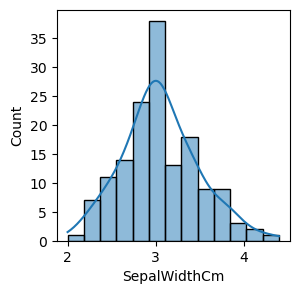

In [21]:
plt.figure(figsize=(3,3))
sns.histplot(data=d,x='SepalWidthCm',kde=True)

In [ ]:
# clearly outliers are seen so we will identify with 3-sigma rule and replace with mean since data is normal 

In [22]:
low_limit=d['SepalWidthCm'].mean()-3*d['SepalWidthCm'].std()
upper_limit=d['SepalWidthCm'].mean()+3*d['SepalWidthCm'].std()
print(low_limit)
print(upper_limit)

1.7532170659134791
4.354782934086521


In [23]:
# find values greater than upper limit 
d.loc[d['SepalWidthCm']>upper_limit]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,0


In [24]:
# replace outlier with mean 
d.loc[d['SepalWidthCm']>upper_limit,'SepalWidthCm']=d['SepalWidthCm'].mean()

<Axes: xlabel='SepalWidthCm'>

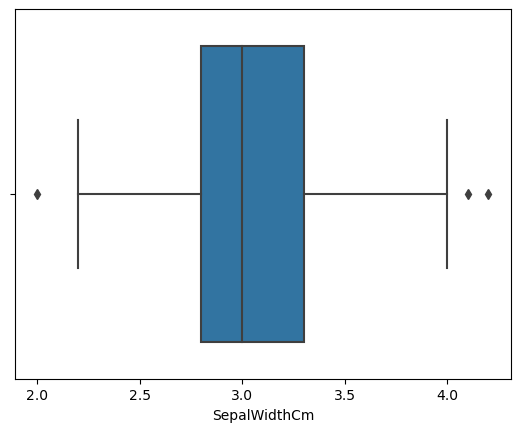

In [25]:
sns.boxplot(data=d,x='SepalWidthCm')

In [28]:
# applying scaling
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
d[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]=scaling.fit_transform(d[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [29]:
d.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.088864,-1.341272,-1.312977,0
1,-1.143017,-0.107760,-1.341272,-1.312977,0
2,-1.385353,0.370890,-1.398138,-1.312977,0
3,-1.506521,0.131565,-1.284407,-1.312977,0
4,-1.021849,1.328189,-1.341272,-1.312977,0


In [32]:
# remove species column from data 
x=d.drop('Species',axis=1)

In [33]:
# Applying kmean model
from sklearn.cluster import KMeans
model=KMeans(n_clusters=6,random_state=10)
model.fit(x)

C:\Users\MAHARSH SHAH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAHARSH SHAH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=10)

In [34]:
model.cluster_centers_

array([[ 8.62520255e-01,  2.30595812e-01,  8.54920301e-01,
         1.05353673e+00],
       [-7.92495572e-01,  1.41366221e+00, -1.28643762e+00,
        -1.22376293e+00],
       [-3.64080601e-01, -1.44114126e+00,  1.07449102e-01,
         1.75297293e-03],
       [-1.29723056e+00,  8.30471707e-02, -1.32834838e+00,
        -1.29504859e+00],
       [ 2.53602227e-01, -5.29727484e-01,  5.48764020e-01,
         4.93046703e-01],
       [ 1.97705575e+00,  1.91396054e-01,  1.44514709e+00,
         1.11927322e+00]])

In [35]:
model.labels_

array([1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 0, 0, 0, 2, 4, 4, 0, 2, 4, 2, 2, 4, 2, 4, 4, 0,
       4, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 0, 4, 2, 2, 2, 2, 4, 4, 0, 0, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 0, 4, 5, 4, 0, 5, 2, 5, 4, 5,
       0, 4, 0, 4, 4, 0, 0, 5, 5, 2, 0, 4, 5, 4, 0, 5, 4, 4, 0, 5, 5, 5,
       0, 4, 4, 5, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

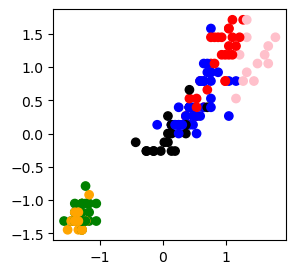

In [36]:
# visualize the clusters 
plt.figure(figsize=(3,3))
color_schema=np.array(["red","green","black","orange","blue","pink"])
plt.scatter(x.PetalLengthCm,x.PetalWidthCm,color=color_schema[model.labels_])

In [37]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.3303281700316024

In [ ]:
# we see overlapping in clusters as no. of clusters choosen can be wrong 

Text(0, 0.5, 'WCSS')

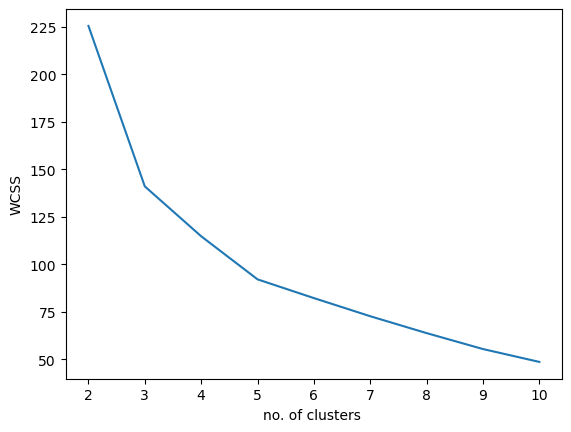

In [40]:
#choosing optimal vaalue of k with the help of elbow method 
WCSS=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=20)
    model.fit(x)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.xlabel('no. of clusters ')
plt.ylabel('WCSS')

In [41]:
print(WCSS)

[225.50046206211445, 141.06688377407846, 114.82880681387991, 92.153428590453, 82.29541504498773, 72.74855093311187, 63.86535212246593, 55.48098553300095, 48.70932612266401]


In [ ]:
# clearly we can see that the optimal value is 3 

In [42]:
model=KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [43]:
silhouette_score(x,model.labels_)

0.461588416586402

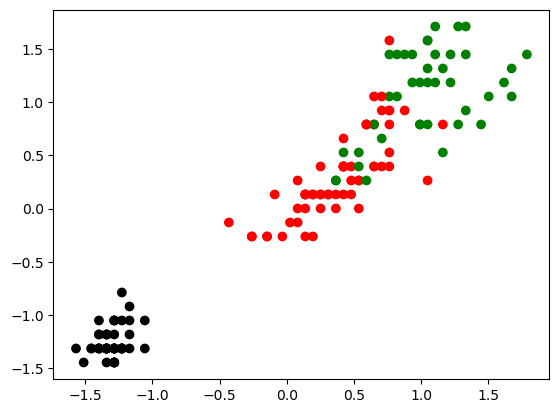

In [44]:
plt.scatter(x.PetalLengthCm,x.PetalWidthCm,color=color_schema[model.labels_])